<a href="https://colab.research.google.com/github/amirabbasgashtil/Principal-Component-Analysis/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the dataset and reading first 5 samples

**about the dataset**: the dataset is a comprehensive anthropometric survey of US military personnel. This dataset was conducted between 2010 and 2012 and includes 3D body scans and 93 measurements. Directly for more than 6000 people. This data provides traditional measurements and 3D scans for advanced analysis and modern engineering needs.

In [87]:
### uploading the dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()
scans_dataset = pd.read_csv("dataset.csv")
scans_dataset

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Service Support,Regular Army,Male,336,1463,333,247,1343,265,205,...,284,415,1050,176,883.0,105.9,1.775,33.612378,Overweight,Tall
1,Combat Service Support,Army National Guard,Male,311,1523,332,249,1397,269,201,...,283,468,1074,181,908.0,108.3,1.850,31.643535,Overweight,Tall
2,Combat Arms,Regular Army,Male,278,1522,365,225,1413,276,222,...,233,372,1156,182,890.0,90.1,1.854,26.212312,Overweight,Tall
3,Combat Arms,Regular Army,Male,259,1504,347,232,1380,258,218,...,250,441,1079,189,882.0,90.0,1.828,26.933335,Overweight,Tall
4,Combat Arms,Regular Army,Male,251,1384,326,226,1262,255,200,...,227,355,1004,177,820.0,81.2,1.681,28.735622,Overweight,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Combat Support,Army National Guard,Male,222,1413,346,208,1304,245,215,...,218,371,1041,185,820.0,68.0,1.744,22.357125,Normal,Normal
6064,Combat Service Support,Regular Army,Female,222,1315,302,214,1208,222,181,...,225,395,950,147,807.0,66.2,1.618,25.287212,Overweight,Normal
6065,Combat Arms,Army National Guard,Male,193,1525,362,215,1423,250,209,...,183,352,1155,169,862.0,67.5,1.827,20.222120,Normal,Tall
6066,Combat Arms,Regular Army,Male,231,1451,330,215,1342,252,197,...,221,403,1067,166,864.0,74.7,1.773,23.763102,Normal,Tall


# data preparation and handling NaN values
**for numeric data:**
handling the NaN values with mean method. replacing with the mean is most common method for dealing with missing numerical values.

**for non-numeric data:** just removing samples with NaN values because after that still we have around 6000 samples but cleaned data.

In [88]:
from pandas.api.types import is_numeric_dtype
from sklearn.impute import SimpleImputer

print(scans_dataset.isna().sum().sum())

col_names = list(scans_dataset.columns)
for col in col_names:
  if is_numeric_dtype(scans_dataset[col]):
    ## numeric values
    scans_dataset[col].fillna(scans_dataset[col].mean(), inplace=True)
  else:
    ## non-numeric values
    scans_dataset.dropna(subset=[col], inplace=True)

## now we dont have missing values
print(scans_dataset.isna().sum().sum())

print(f"now we have {len(scans_dataset.axes[0])} samples and {len(scans_dataset.axes[1])} features **not bad**")

9800
0
now we have 5964 samples and 99 features **not bad**


<ipython-input-88-5b0fe3c40f50>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scans_dataset[col].fillna(scans_dataset[col].mean(), inplace=True)


# Encoding (non-numeric values to numeric)



In [89]:
for col in scans_dataset.columns:
  if not is_numeric_dtype(scans_dataset[col]):
    print(col)

Branch
Component
Gender
BMI_class
Height_class


In [90]:
non_num = scans_dataset[["Branch", "Component", "Gender", "BMI_class", "Height_class"]]
non_num.head()

,Branch,Component,Gender,BMI_class,Height_class
0,Combat Service Support,Regular Army,Male,Overweight,Tall
1,Combat Service Support,Army National Guard,Male,Overweight,Tall
2,Combat Arms,Regular Army,Male,Overweight,Tall
3,Combat Arms,Regular Army,Male,Overweight,Tall
4,Combat Arms,Regular Army,Male,Overweight,Normal


it seems like one hot encoder is best encoder for this columns because they haven't any order and only have some limited clsses

In [91]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
non_numeric_cols = []
for col in scans_dataset.columns:
  if not is_numeric_dtype(scans_dataset[col]):
    non_numeric_cols.append(col)

encoded_arr = encoder.fit_transform(scans_dataset[non_numeric_cols])
encoded_df = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names_out(non_numeric_cols), index=scans_dataset.index)

scans_dataset = pd.concat([scans_dataset.drop(columns=non_numeric_cols), encoded_df], axis=1)
scans_dataset.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Component_Army Reserve,Component_Regular Army,Gender_Female,Gender_Male,BMI_class_Normal,BMI_class_Overweight,BMI_class_Underweight,Height_class_Normal,Height_class_Small,Height_class_Tall
0,336,1463,333,247,1343,265,205,424,376,283,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,311,1523,332,249,1397,269,201,450,368,318,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,278,1522,365,225,1413,276,222,406,370,268,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,259,1504,347,232,1380,258,218,411,357,288,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,251,1384,326,226,1262,255,200,400,371,259,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# feature scaling
i used standard scaler or z-score normalization.
now the standard deviation is **1** and mean is **0**.

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scans_dataset = scaler.fit_transform(scans_dataset)
scans_dataset.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Component_Army Reserve,Component_Regular Army,Gender_Female,Gender_Male,BMI_class_Normal,BMI_class_Overweight,BMI_class_Underweight,Height_class_Normal,Height_class_Small,Height_class_Tall
0,2.395465,0.722406,0.274904,1.378811,0.606047,1.238105,0.761113,0.823646,0.848177,0.430599,...,-0.19478,0.965712,-0.702577,0.702577,-0.700448,0.706307,-0.060848,-1.124383,-0.208733,1.225002
1,1.726834,1.481127,0.226690,1.503341,1.356046,1.475342,0.465674,1.681601,0.655248,2.248991,...,-0.19478,-1.035506,-0.702577,0.702577,-0.700448,0.706307,-0.060848,-1.124383,-0.208733,1.225002
2,0.844242,1.468481,1.817765,0.008979,1.578268,1.890506,2.016730,0.229677,0.703480,-0.348712,...,-0.19478,0.965712,-0.702577,0.702577,-0.700448,0.706307,-0.060848,-1.124383,-0.208733,1.225002
3,0.336082,1.240865,0.949906,0.444834,1.119935,0.822940,1.721291,0.394668,0.389971,0.690369,...,-0.19478,0.965712,-0.702577,0.702577,-0.700448,0.706307,-0.060848,-1.124383,-0.208733,1.225002
4,0.122120,-0.276575,-0.062596,0.071244,-0.518951,0.645013,0.391814,0.031687,0.727596,-0.816299,...,-0.19478,0.965712,-0.702577,0.702577,-0.700448,0.706307,-0.060848,0.889377,-0.208733,-0.816325


# Applying PCA

In [93]:
print(scans_dataset.isna().sum().sum())

0


In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
reduced_df = pd.DataFrame(pca.fit_transform(scans_dataset))
reduced_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,7.665690,5.624624,1.256940,2.509810,-1.404502,0.490019,1.252255,-0.951535,0.575144,0.628041,...,-0.351539,1.125401,-0.606952,1.305464,-0.539410,0.582006,1.038115,0.650962,0.950476,0.001877
1,10.830393,2.093454,1.464556,2.141023,2.222936,0.555969,1.416969,0.322431,0.312594,-0.053056,...,1.512374,-0.265655,-0.375571,0.426116,-0.915814,-0.663552,-0.230094,0.056633,-0.237732,-0.795513
2,9.879324,-3.498708,2.058164,-1.168750,-2.165530,-0.336192,-1.591220,-0.624179,0.826691,-0.159557,...,-0.244870,0.490544,0.491155,-0.793206,-1.144779,-0.465884,0.759728,-0.172499,0.597585,1.584208
3,7.568746,-1.635808,0.858279,2.094267,-0.900085,0.375781,-1.516660,-0.627523,1.219302,-3.490822,...,0.664925,-0.549923,-0.184471,0.363995,0.719114,0.748120,-0.967093,-0.798188,0.485237,0.909600
4,0.648940,0.009197,-1.920768,-3.335498,-0.681690,0.864854,-1.562972,-1.730045,0.218858,-0.258949,...,-0.323129,-0.160887,-0.431035,-0.219047,-0.717040,-0.071066,0.432340,0.685580,-0.179911,0.313450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,-0.044919,-5.810973,-1.614382,-1.343709,2.849481,0.833981,-1.480914,-0.081125,-0.489722,-2.892044,...,-0.063186,0.668318,0.164386,-0.564870,-0.199538,0.328479,-0.673166,-0.176896,0.137551,0.498018
5960,-10.033316,1.877155,2.438303,1.838848,-1.334175,0.181536,0.730354,-0.561168,-0.618761,-1.054650,...,0.136364,-0.066016,-0.123878,-0.564981,0.695195,0.214509,0.213349,-0.027643,0.531063,0.536721
5961,4.721981,-10.300837,0.523090,-1.171720,1.412290,-0.265972,-0.823476,2.239141,-0.252560,1.500236,...,0.756617,0.068726,0.487685,-0.625523,-0.296637,-0.682366,0.236507,-0.041529,-0.311454,-0.421283
5962,0.329080,-2.851979,-0.310612,3.492159,-1.928244,-0.099767,-1.116943,0.409724,0.344930,1.250635,...,-0.147738,-0.139258,0.328430,0.667245,0.188552,0.191200,0.907559,-0.039813,1.042433,0.831553


In [99]:
import numpy as np

## ration of variance for each compnent (in percent)
explained_variance_ratio = pca.explained_variance_ratio_
## just computes total variance in dataframe
total_variance = np.sum(reduced_df.var(axis=0))
## finally ->
variance_per_component = explained_variance_ratio * total_variance
variance_per_component

array([51.15625273, 12.51683938,  5.3034305 ,  2.89662266,  2.09103954,
        1.8423875 ,  1.57872776,  1.45682752,  1.3183623 ,  1.18591845,
        1.14901811,  1.03335983,  1.0141326 ,  0.97043553,  0.93352072,
        0.87543916,  0.80952056,  0.77293499,  0.71654881,  0.60516412,
        0.58343405,  0.57826877,  0.54225344,  0.5293085 ,  0.51562067,
        0.46952157,  0.45843247,  0.42685348,  0.3996671 ,  0.37591215,
        0.37188093,  0.35805615,  0.34295865,  0.30231668,  0.29230281,
        0.27894874,  0.26362712,  0.25208735])

In [104]:
## Cumulative variance:
c_var = 0
Cumulative_var = []
print(f"Here is the variance ratio for each component: \n{explained_variance_ratio}")
for i in range(len(explained_variance_ratio)):
    c_var += explained_variance_ratio[i]
    Cumulative_var.append(c_var)
print(f"Here is the cumulative variance for each component: \n{Cumulative_var}")

Here is the variance ratio for each component: 
[0.49830688 0.12192502 0.05166008 0.02821565 0.02036856 0.01794647
 0.0153782  0.01419078 0.01284201 0.01155189 0.01119245 0.01006583
 0.00987854 0.0094529  0.00909331 0.00852755 0.00788544 0.00752907
 0.00697982 0.00589483 0.00568316 0.00563285 0.00528203 0.00515593
 0.0050226  0.00457355 0.00446554 0.00415793 0.00389311 0.00366171
 0.00362245 0.00348778 0.00334072 0.00294483 0.00284729 0.00271721
 0.00256796 0.00245555]
Here is the cumulative variance for each component: 
[0.4983068767694181, 0.6202318968393903, 0.6718919725347662, 0.7001076239027104, 0.7204761874378958, 0.7384226614596119, 0.7538008578075448, 0.7679916386746223, 0.7808336465543052, 0.7923855348446162, 0.8035779814311433, 0.8136438146533117, 0.8235223578092048, 0.8329752530773104, 0.8420685655715259, 0.8505961126575616, 0.8584815546009176, 0.8660106209751567, 0.8729904363835812, 0.8788852669911928, 0.8845684276249333, 0.8902012738369411, 0.8954832990987387, 0.9006392292

# reducing number of principle component to 2


In [106]:
pca2 = PCA(n_components=2)
reduced2_df = pd.DataFrame(pca2.fit_transform(scans_dataset))

reduced2_df

,0,1
0,7.665690,5.624624
1,10.830393,2.093454
2,9.879324,-3.498708
3,7.568746,-1.635808
4,0.648940,0.009197
...,...,...
5959,-0.044919,-5.810973
5960,-10.033316,1.877155
5961,4.721981,-10.300837
5962,0.329080,-2.851979


# pca with keeping 90% of variance

In [107]:
pca90 = PCA(n_components=90)
reduced90_df = pd.DataFrame(pca90.fit_transform(scans_dataset))

reduced90_df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,7.665690,5.624624,1.256940,2.509810,-1.404502,0.490019,1.252255,-0.951535,0.575144,0.628041,...,-0.217349,0.293705,-0.109338,0.149425,0.094935,-0.158576,0.248903,-0.087389,-0.090346,0.192970
1,10.830393,2.093454,1.464556,2.141023,2.222936,0.555969,1.416969,0.322431,0.312594,-0.053056,...,-0.314731,0.169674,-0.074682,0.238022,-0.015273,-0.100593,-0.046570,-0.138391,-0.331074,0.121311
2,9.879324,-3.498708,2.058164,-1.168750,-2.165530,-0.336192,-1.591220,-0.624179,0.826691,-0.159557,...,-0.269931,0.108610,-0.252138,-0.064191,-0.013173,-0.123626,-0.022302,-0.102801,-0.042888,-0.275080
3,7.568746,-1.635808,0.858279,2.094267,-0.900085,0.375781,-1.516660,-0.627523,1.219302,-3.490822,...,0.086322,-0.045038,-0.085019,-0.085211,-0.238319,0.148117,-0.094431,0.413990,-0.181885,-0.186108
4,0.648940,0.009197,-1.920768,-3.335498,-0.681690,0.864854,-1.562972,-1.730045,0.218858,-0.258949,...,0.146839,0.056390,0.110487,0.334506,-0.215482,0.160047,0.088082,0.130164,-0.007018,-0.125149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,-0.044919,-5.810973,-1.614382,-1.343709,2.849481,0.833981,-1.480914,-0.081125,-0.489722,-2.892044,...,0.096194,-0.090744,0.008811,0.324230,0.012778,-0.100284,-0.168125,-0.072360,-0.093813,-0.405019
5960,-10.033316,1.877155,2.438303,1.838848,-1.334175,0.181536,0.730354,-0.561168,-0.618761,-1.054650,...,0.407648,-0.037143,-0.059161,0.343052,0.031366,-0.153354,0.023322,0.007008,0.122106,0.079834
5961,4.721981,-10.300837,0.523090,-1.171720,1.412290,-0.265972,-0.823476,2.239141,-0.252560,1.500236,...,-0.157662,-0.053902,-0.018712,-0.096151,-0.011140,0.377635,0.005074,-0.303649,-0.118027,-0.174296
5962,0.329080,-2.851979,-0.310612,3.492159,-1.928244,-0.099767,-1.116943,0.409724,0.344930,1.250635,...,0.111840,0.135040,0.232954,-0.090020,-0.227288,0.239852,-0.089403,-0.052635,0.001957,0.235192


# finding best index

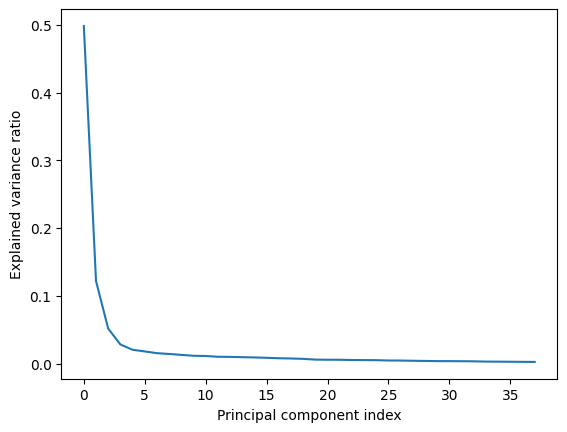

In [108]:
import matplotlib.pyplot as plt

var = explained_variance_ratio
plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

it seems that 5 to 10 number of principal components can be the best index.